## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [ ]:
# Go to the directory where the data file is located. 
os.chdir(r'~~')                # Please, replace the path with your own.  

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: '~~'

In [ ]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [ ]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [ ]:
# Categories of 'supp'. 
df.supp.unique()

array(['VC', 'OJ'], dtype=object)

In [ ]:
# Group by category.
df.groupby(df['supp']).sum()

,len,dose
supp,,
OJ,619.9,35.0
VC,508.9,35.0


In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='supp', ylabel='len'>

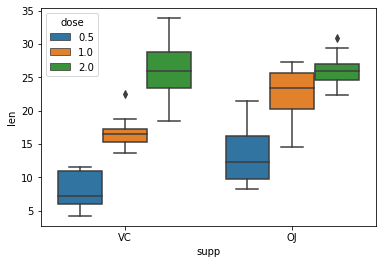

In [ ]:
sns.boxplot(x='supp',y='len',hue='dose',data=df)

In [ ]:
# ANOVA.
print(st.f_oneway(df['len'][df['supp']=='OJ'],df['len'][df['supp']=='VC']))

F_onewayResult(statistic=3.668252541070971, pvalue=0.060393371224128745)


The p-value is bigger than alpha, so we fail to reject the null hypothesis that there is no siginificant difference between the means of each group 

2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [ ]:
# Categories of 'dose'. 
df.dose.unique()

array([0.5, 1. , 2. ])

In [ ]:
# Group by category.
df.groupby(df['dose']).sum()

,len
dose,
0.5,212.1
1.0,394.7
2.0,522.0


<AxesSubplot:xlabel='dose', ylabel='len'>

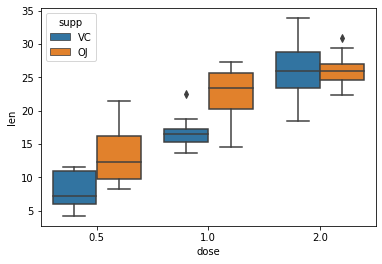

In [ ]:
sns.boxplot(x='dose',y='len',hue='supp',data=df)

In [ ]:
# ANOVA.
print(st.f_oneway(df['len'][df['dose']==0.5],df['len'][df['dose']==1.0],df['len'][df['dose']==2.0]))

F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16)


The p-value is very small (smaller than alpha), so we reject the null hypothesis H0 (H0 : there is no significant difference between the means of len when dose=0.5, dose=1.0, dose=2.0)